In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from glob import glob

In [3]:
files = glob('../data/names/*.txt')

In [4]:
dfs = []
column_names = ['Name', 'Sex', 'Frequency']
for f in files:
    df = pd.read_csv(files[0], header=None, names=column_names, dtype={'Frequency': int})
    birth_year = f.split('/')[-1].replace('.txt', '').replace('yob', '')
    df['Birth Year'] = int(birth_year)
    df['Year Samples'] = df['Frequency'].sum()
    df['Name'] = df['Name'].apply(lambda s: s.strip())
    dfs.append(df)
    
df = pd.concat(dfs)

In [5]:
df['Length'] = df['Name'].apply(lambda s: len(s))

In [6]:
df.sort_values('Birth Year', inplace=True)

In [7]:
df.head()

Name Sex  Frequency  Birth Year  Year Samples  Length
11950  Wwilliam   M          5        1880       3626317       8
7960    Cameron   M        325        1880       3626317       7
7961       Seth   M        325        1880       3626317       4
7962    Gerardo   M        324        1880       3626317       7
7963     Lowell   M        323        1880       3626317       6

# Top 20 Names by Length

In [8]:
df[['Name', 'Length']].sort_values('Length', ascending=False).drop_duplicates().head(20)

Name  Length
3216   Maryelizabeth      13
4397   Marycatherine      13
9818    Christropher      12
2888    Marymargaret      12
11266   Konstantinos      12
5609    Marypatricia      12
10829   Constantinos      12
10350   Christorpher      12
10244   Michelangelo      12
4012    Elizabethann      12
2382     Maryfrances      11
1655     Jackqueline      11
3977     Charlesetta      11
5798     Wilhelmenia      11
10243    Maximiliano      11
9633     Constantino      11
7550     Christopher      11
5831     Antoninette      11
6251     Marykathryn      11
6071     Jacquenette      11

# Top 20 Names by Frequency

In [9]:
df[['Name', 'Frequency']].sort_values('Frequency', ascending=False)[['Name']].drop_duplicates().head(20)

Name
7533   Michael
7534      John
7535     David
7536     James
7537    Robert
0         Lisa
7538   William
7539      Mark
7540   Richard
1         Mary
2        Karen
7541    Thomas
7542   Jeffrey
3     Kimberly
7543    Joseph
7544   Timothy
7545     Kevin
7546    Steven
4        Susan
7547     Scott

# Popular Names in 1988

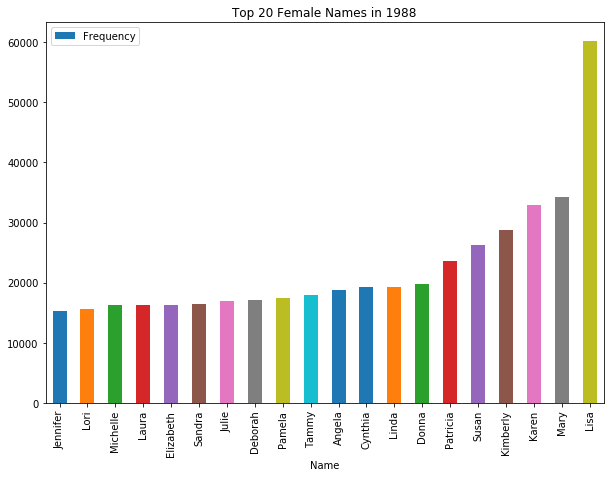

In [10]:
q = (df['Birth Year'] == 1988) & (df['Sex'] == 'F')
df[q].sort_values('Frequency').tail(20).plot(x='Name', y='Frequency', kind='bar', figsize=(10,7), title='Top 20 Female Names in 1988')

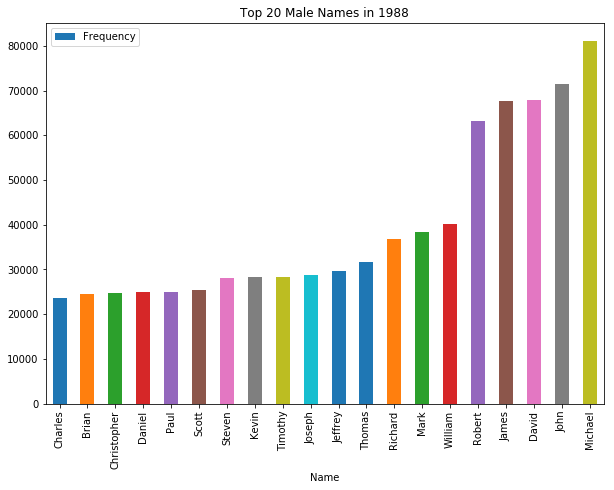

In [11]:
q = (df['Birth Year'] == 1988) & (df['Sex'] == 'M')
df[q].sort_values('Frequency').tail(20).plot(x='Name', y='Frequency', kind='bar', figsize=(10,7), title='Top 20 Male Names in 1988')

# Popular Names in 1991

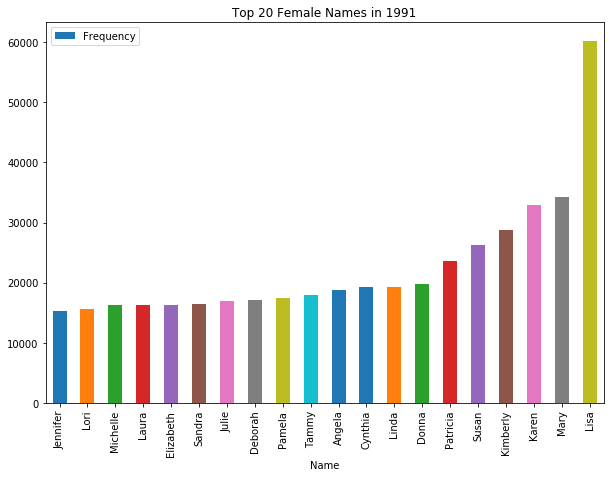

In [12]:
q = (df['Birth Year'] == 1991) & (df['Sex'] == 'F')
df[q].sort_values('Frequency').tail(20).plot(x='Name', y='Frequency', kind='bar', figsize=(10,7), title='Top 20 Female Names in 1991')

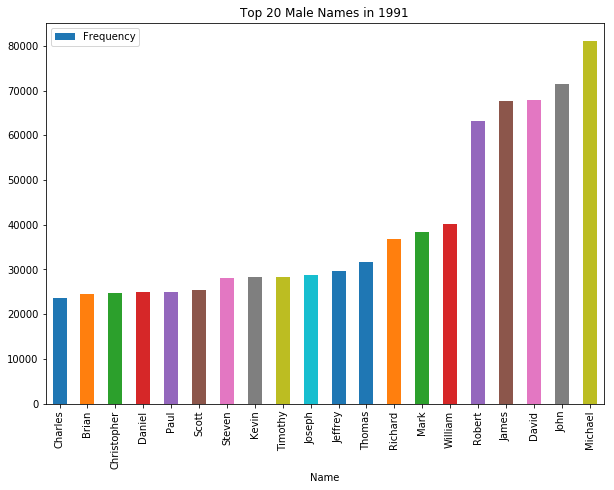

In [13]:
q = (df['Birth Year'] == 1991) & (df['Sex'] == 'M')
df[q].sort_values('Frequency').tail(20).plot(x='Name', y='Frequency', kind='bar', figsize=(10,7), title='Top 20 Male Names in 1991')

# Create Sex Frequecy Per Row

Each year has a separate record for male and female frequencies. Let's merge them together on one record.

In [14]:
df.head()

Name Sex  Frequency  Birth Year  Year Samples  Length
11950  Wwilliam   M          5        1880       3626317       8
7960    Cameron   M        325        1880       3626317       7
7961       Seth   M        325        1880       3626317       4
7962    Gerardo   M        324        1880       3626317       7
7963     Lowell   M        323        1880       3626317       6

In [15]:
q = df['Sex'] == 'M'
male_freqs = df[q].copy()

In [16]:
q = df['Sex'] == 'F'
female_freqs = df[q].copy()

In [17]:
len(df['Name'].unique())

10832

In [18]:
len(male_freqs['Name'].unique()) + len(female_freqs['Name'].unique())

11951

In [19]:
def make_key(vals):
    return str(vals[0]) + '-' + str(vals[1])

In [20]:
df['Key'] = df[['Name', 'Birth Year']].apply(make_key, axis=1)

In [21]:
df = df[['Name', 'Birth Year', 'Year Samples', 'Length', 'Key']].drop_duplicates().set_index('Key')

In [22]:
df.head()

Name  Birth Year  Year Samples  Length
Key                                                      
Wwilliam-1880  Wwilliam        1880       3626317       8
Cameron-1880    Cameron        1880       3626317       7
Seth-1880          Seth        1880       3626317       4
Gerardo-1880    Gerardo        1880       3626317       7
Lowell-1880      Lowell        1880       3626317       6

In [23]:
male_freqs['Key'] = male_freqs[['Name', 'Birth Year']].apply(make_key, axis=1)

In [24]:
male_freqs = male_freqs[['Key', 'Frequency']]

In [25]:
male_freqs = male_freqs.set_index('Key')

In [26]:
male_freqs = male_freqs.rename({'Frequency': 'Male Frequency'}, axis=1)

In [27]:
male_freqs.head()

Male Frequency
Key                          
Wwilliam-1880               5
Cameron-1880              325
Seth-1880                 325
Gerardo-1880              324
Lowell-1880               323

In [28]:
df = df.join(male_freqs)

In [29]:
len(df['Name'].unique())

10832

In [30]:
female_freqs['Key'] = female_freqs[['Name', 'Birth Year']].apply(make_key, axis=1)

In [31]:
female_freqs = female_freqs[['Key', 'Frequency']]

In [32]:
female_freqs = female_freqs.set_index('Key')

In [33]:
female_freqs = female_freqs.rename({'Frequency': 'Female Frequency'}, axis=1)

In [34]:
female_freqs.head()

Female Frequency
Key                            
Violette-1880                 5
Vionette-1880                 5
Vona-1880                     5
Voncille-1880                 5
Vonetta-1880                  5

In [35]:
df = df.join(female_freqs)

In [36]:
len(df['Name'].unique())

10832

In [37]:
df = df.fillna(0)

In [38]:
df.head()

Name  Birth Year  Year Samples  Length  Male Frequency  \
Key                                                                         
Wwilliam-1880  Wwilliam        1880       3626317       8             5.0   
Cameron-1880    Cameron        1880       3626317       7           325.0   
Seth-1880          Seth        1880       3626317       4           325.0   
Gerardo-1880    Gerardo        1880       3626317       7           324.0   
Lowell-1880      Lowell        1880       3626317       6           323.0   

               Female Frequency  
Key                              
Wwilliam-1880               0.0  
Cameron-1880               29.0  
Seth-1880                   0.0  
Gerardo-1880                0.0  
Lowell-1880                 0.0

In [39]:
df['Total Frequency'] = df['Male Frequency'] + df['Female Frequency']

# Determine Sex on Frequency

In [40]:
def determine_sex(vals):
    m_freq = vals[0]
    f_freq = vals[1]
    
    sex = 'Both'
    if m_freq < 1:
        sex = 'Female'
    elif f_freq < 1:
        sex = 'Male'
        
    return sex

In [41]:
df['Sex'] = df[['Male Frequency', 'Female Frequency']].apply(determine_sex, axis=1)

In [42]:
df.head()

Name  Birth Year  Year Samples  Length  Male Frequency  \
Key                                                                         
Wwilliam-1880  Wwilliam        1880       3626317       8             5.0   
Cameron-1880    Cameron        1880       3626317       7           325.0   
Seth-1880          Seth        1880       3626317       4           325.0   
Gerardo-1880    Gerardo        1880       3626317       7           324.0   
Lowell-1880      Lowell        1880       3626317       6           323.0   

               Female Frequency  Total Frequency   Sex  
Key                                                     
Wwilliam-1880               0.0              5.0  Male  
Cameron-1880               29.0            354.0  Both  
Seth-1880                   0.0            325.0  Male  
Gerardo-1880                0.0            324.0  Male  
Lowell-1880                 0.0            323.0  Male

In [43]:
df['% Male'] = (df['Male Frequency'] / df['Total Frequency']) * 100

In [44]:
df['% Female'] = (df['Female Frequency'] / df['Total Frequency']) * 100

In [45]:
df['% Year'] = (df['Total Frequency'] / df['Year Samples']) * 100

In [46]:
df.head()

Name  Birth Year  Year Samples  Length  Male Frequency  \
Key                                                                         
Wwilliam-1880  Wwilliam        1880       3626317       8             5.0   
Cameron-1880    Cameron        1880       3626317       7           325.0   
Seth-1880          Seth        1880       3626317       4           325.0   
Gerardo-1880    Gerardo        1880       3626317       7           324.0   
Lowell-1880      Lowell        1880       3626317       6           323.0   

               Female Frequency  Total Frequency   Sex     % Male  % Female  \
Key                                                                           
Wwilliam-1880               0.0              5.0  Male  100.00000   0.00000   
Cameron-1880               29.0            354.0  Both   91.80791   8.19209   
Seth-1880                   0.0            325.0  Male  100.00000   0.00000   
Gerardo-1880                0.0            324.0  Male  100.00000   0.00000   
Lowell-1880                 0.0            323.0  Male  100.00000   0.00000   

                 % Year  
Key                      
Wwilliam-1880  0.000138  
Cameron-1880   0.009762  
Seth-1880      0.008962  
Gerardo-1880   0.008935  
Lowell-1880    0.008907

# Determine Presenditial Ties

In [47]:
presidents_df = pd.read_csv('../data/presidents.csv')

In [48]:
pres_first = set([n.lower() for n in presidents_df['First Name'].values])
pres_last = set([n.lower() for n in presidents_df['Last Name'].values])

def name_is_presidential(name):
    name = name.lower()
    return name in pres_first or name in pres_last

In [49]:
df['Presidential'] = df['Name'].apply(name_is_presidential)

In [50]:
df.head()

Name  Birth Year  Year Samples  Length  Male Frequency  \
Key                                                                         
Wwilliam-1880  Wwilliam        1880       3626317       8             5.0   
Cameron-1880    Cameron        1880       3626317       7           325.0   
Seth-1880          Seth        1880       3626317       4           325.0   
Gerardo-1880    Gerardo        1880       3626317       7           324.0   
Lowell-1880      Lowell        1880       3626317       6           323.0   

               Female Frequency  Total Frequency   Sex     % Male  % Female  \
Key                                                                           
Wwilliam-1880               0.0              5.0  Male  100.00000   0.00000   
Cameron-1880               29.0            354.0  Both   91.80791   8.19209   
Seth-1880                   0.0            325.0  Male  100.00000   0.00000   
Gerardo-1880                0.0            324.0  Male  100.00000   0.00000   
Lowell-1880                 0.0            323.0  Male  100.00000   0.00000   

                 % Year  Presidential  
Key                                    
Wwilliam-1880  0.000138         False  
Cameron-1880   0.009762         False  
Seth-1880      0.008962         False  
Gerardo-1880   0.008935         False  
Lowell-1880    0.008907         False

In [51]:
q = df['Presidential'] == True

In [52]:
len(df[q]['Name'].unique())

59

In [53]:
df[q]['Name'].unique()

array(['Zachary', 'Lyndon', 'Roosevelt', 'Tyler', 'Wilson', 'Abraham',
       'Kennedy', 'Grover', 'Lincoln', 'Woodrow', 'Cleveland', 'Jefferson',
       'Gerald', 'Martin', 'George', 'Andrew', 'Jimmy', 'Arthur', 'Thomas',
       'Ronald', 'Donald', 'Richard', 'William', 'John', 'James',
       'Clinton', 'Chester', 'Grant', 'Bill', 'Calvin', 'Warren', 'Harry',
       'Benjamin', 'Theodore', 'Dwight', 'Herbert', 'Franklin', 'Johnson',
       'Madison', 'Millard', 'Taylor', 'Ulysses', 'Jackson', 'Harrison',
       'Carter', 'Mckinley', 'Monroe', 'Truman', 'Adams', 'Hoover',
       'Rutherford', 'Pierce', 'Hayes', 'Ford', 'Garfield', 'Reagan',
       'Harding', 'Washington', 'Taft'], dtype=object)

# Find Common Name Endings...

In [54]:
df['Length'].max()

13

In [55]:
#prefill
endings = {}

for name in df['Name'].unique():
    length = len(name)
    reversed = name[::-1]
    for idx in range(0, length):
        ending = reversed[0:idx+1][::-1]
        
        if not ending in endings:
            endings[ending] = 0
            
        endings[ending] += 1

In [56]:
endings_df = pd.melt(pd.DataFrame(endings, index=[0]), var_name='Ending', value_name='Frequency')

In [57]:
endings_df['Length'] = endings_df['Ending'].apply(lambda s: len(s))

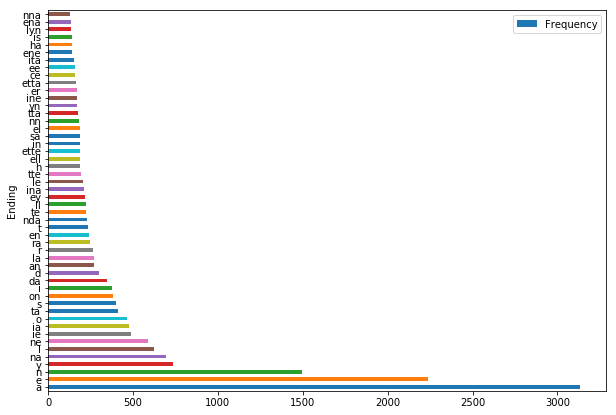

In [58]:
endings_df.nlargest(50, 'Frequency').plot(kind='barh', x='Ending', y='Frequency', figsize=(10,7))

# Find Common Name Beginnings...

In [59]:
df['Length'].max()

13

In [60]:
#prefill
beginnings = {}

for name in df['Name'].unique():
    length = len(name)
    for idx in range(0, length):
        beginning = name[0:idx+1]
        
        if not beginning in beginnings:
            beginnings[beginning] = 0
            
        beginnings[beginning] += 1

In [61]:
beginnings_df = pd.melt(pd.DataFrame(beginnings, index=[0]), var_name='Beginning', value_name='Frequency')

In [62]:
beginnings_df['Length'] = beginnings_df['Beginning'].apply(lambda s: len(s))

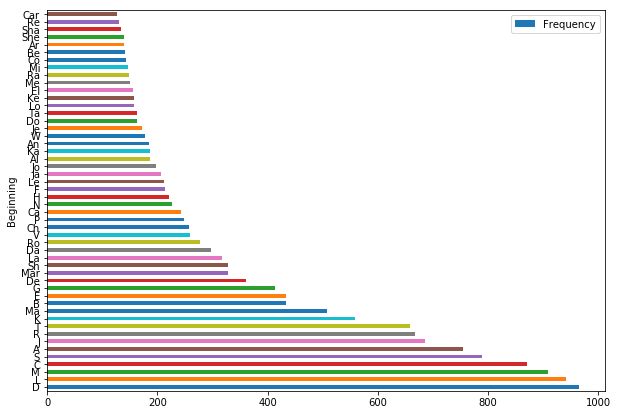

In [63]:
beginnings_df.nlargest(50, 'Frequency').plot(kind='barh', x='Beginning', y='Frequency', figsize=(10,7))

# Add Endings and Beginnings to DF

In [64]:
top_50 = beginnings_df.nlargest(50, 'Frequency')['Beginning'].unique()

for beginning in top_50:
    df['Begins ' + beginning] = df['Name'].apply(lambda s: s.startswith(beginning))

In [65]:
top_50 = endings_df.nlargest(50, 'Frequency')['Ending'].unique()

for ending in top_50:
    df['Ends ' + ending] = df['Name'].apply(lambda s: s.endswith(ending))

In [66]:
df.head()

Name  Birth Year  Year Samples  Length  Male Frequency  \
Key                                                                         
Wwilliam-1880  Wwilliam        1880       3626317       8             5.0   
Cameron-1880    Cameron        1880       3626317       7           325.0   
Seth-1880          Seth        1880       3626317       4           325.0   
Gerardo-1880    Gerardo        1880       3626317       7           324.0   
Lowell-1880      Lowell        1880       3626317       6           323.0   

               Female Frequency  Total Frequency   Sex     % Male  % Female  \
Key                                                                           
Wwilliam-1880               0.0              5.0  Male  100.00000   0.00000   
Cameron-1880               29.0            354.0  Both   91.80791   8.19209   
Seth-1880                   0.0            325.0  Male  100.00000   0.00000   
Gerardo-1880                0.0            324.0  Male  100.00000   0.00000   
Lowell-1880                 0.0            323.0  Male  100.00000   0.00000   

                 ...     Ends etta  Ends ce  Ends ee  Ends ita  Ends ene  \
Key              ...                                                       
Wwilliam-1880    ...         False    False    False     False     False   
Cameron-1880     ...         False    False    False     False     False   
Seth-1880        ...         False    False    False     False     False   
Gerardo-1880     ...         False    False    False     False     False   
Lowell-1880      ...         False    False    False     False     False   

               Ends ha  Ends is  Ends lyn  Ends ena  Ends nna  
Key                                                            
Wwilliam-1880    False    False     False     False     False  
Cameron-1880     False    False     False     False     False  
Seth-1880        False    False     False     False     False  
Gerardo-1880     False    False     False     False     False  
Lowell-1880      False    False     False     False     False  

[5 rows x 112 columns]

# Add Startswith and Endswith Single Letter

In [67]:
df['StartsWith'] = df['Name'].apply(lambda s: s[0])

In [68]:
df['EndsWith'] = df['Name'].apply(lambda s: s[-1])

# Merge Frequencies Over Years for Each Name

In [69]:
total_freq = df.groupby('Name').sum()[['Total Frequency', 'Male Frequency', 'Female Frequency', 'Year Samples']]

In [70]:
total_freq['Name % Male'] = (total_freq['Male Frequency'] / total_freq['Total Frequency']) * 100

In [71]:
total_freq['Name % Female'] = (total_freq['Female Frequency'] / total_freq['Total Frequency']) * 100

In [72]:
total_freq['Popularity %'] = (total_freq['Total Frequency'] / total_freq['Year Samples']) * 100

In [73]:
total_freq.head()

Total Frequency  Male Frequency  Female Frequency  Year Samples  \
Name                                                                      
Aaron          334965.0        330992.0            3973.0     496805429   
Aarron            685.0           685.0               0.0     496805429   
Abbe             4110.0             0.0            4110.0     496805429   
Abbey            2603.0             0.0            2603.0     496805429   
Abbie            9453.0             0.0            9453.0     496805429   

        Name % Male  Name % Female  Popularity %  
Name                                              
Aaron     98.813906       1.186094      0.067424  
Aarron   100.000000       0.000000      0.000138  
Abbe       0.000000     100.000000      0.000827  
Abbey      0.000000     100.000000      0.000524  
Abbie      0.000000     100.000000      0.001903

In [74]:
len(total_freq.index)

10832

In [75]:
df = df.reset_index()
df = df.drop(['Key', 'Birth Year', 'Year Samples', 'Male Frequency', 'Female Frequency', 'Total Frequency', 'Sex', '% Male', '% Female', '% Year'], axis=1)
df = df.drop_duplicates()
df = df.set_index('Name')

In [76]:
len(df.index)

10832

In [77]:
df = df.join(total_freq[['Name % Male', 'Name % Female', 'Popularity %']], how='inner')

In [78]:
len(df.index)

10832

In [79]:
df.head()

Length  Presidential  Begins D  Begins L  Begins M  Begins C  \
Name                                                                     
Wwilliam       8         False     False     False     False     False   
Cameron        7         False     False     False     False      True   
Seth           4         False     False     False     False     False   
Gerardo        7         False     False     False     False     False   
Lowell         6         False     False      True     False     False   

          Begins S  Begins A  Begins J  Begins R      ...       Ends ha  \
Name                                                  ...                 
Wwilliam     False     False     False     False      ...         False   
Cameron      False     False     False     False      ...         False   
Seth          True     False     False     False      ...         False   
Gerardo      False     False     False     False      ...         False   
Lowell       False     False     False     False      ...         False   

          Ends is  Ends lyn  Ends ena  Ends nna  StartsWith  EndsWith  \
Name                                                                    
Wwilliam    False     False     False     False           W         m   
Cameron     False     False     False     False           C         n   
Seth        False     False     False     False           S         h   
Gerardo     False     False     False     False           G         o   
Lowell      False     False     False     False           L         l   

          Name % Male  Name % Female  Popularity %  
Name                                                
Wwilliam    100.00000        0.00000      0.000138  
Cameron      91.80791        8.19209      0.009762  
Seth        100.00000        0.00000      0.008962  
Gerardo     100.00000        0.00000      0.008935  
Lowell      100.00000        0.00000      0.008907  

[5 rows x 107 columns]

# Look at Phonetics with Metaphone...

In [80]:
from phonetics import metaphone, dmetaphone

In [81]:
metaphone('Elizabeth')

'ALSP0'

In [82]:
dmetaphone('Elizabeth')

('ALSP0', 'ALSPT')

In [83]:
dmetaphone('James')

('JMS', 'AMS')

In [84]:
metaphone('Aaron')

'ARN'

In [85]:
metaphone('Erin')

'ARN'

In [86]:
dmetaphone('Aaron')

('ARN', '')

In [87]:
dmetaphone('Erin')

('ARN', '')

# Add Metaphone feature

In [88]:
def get_metaphone(name):
    result = 'NoResult'
    try:
        result = metaphone(name)
    except:
        pass
    
    return result

In [89]:
df['Metaphone'] = df.index.map(get_metaphone)

In [90]:
top_20 = df.groupby('Metaphone').size().sort_values(ascending=False).head(20).index

In [91]:
q = df['Metaphone'].isin(top_20)

In [92]:
len(df[q].index)

1532

# Write Out Features

In [94]:
df.to_csv('../data/features.csv', index=True)